## Problem Statement:
### To predict if the client will subscribe a term deposit

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).	

Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Data Set Characteristics:  	Multivariate	
Number of Instances:	45211	
Area:	Business

Attribute Characteristics:	Real	
Number of Attributes:	17	
Date Donated	2012-02-14
Associated Tasks:	Classification	
Missing Values?	N/A	



# Approach:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).A decision tree can be built with target variable 'y' & The decision tree would use the values of the other attributes to make this prediction. 

###### Import necessary Libraries

In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
bank_data=pd.read_csv('Bank Client Deposit Data set Classification.csv')

In [3]:
bank_data.head()#shows top 5 observations

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###### Exploratory Data Analysis

In [4]:
# take a look at the type, number of columns, entries, null values etc..
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank_data.shape# get shape of dataframe

(45211, 17)

In [7]:
bank_data.isna().sum()#count of null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#Function for imputation
"""This defines the function impute_column with four arguments: 
the dataset, the column index to impute, the imputation strategy, 
and an optional list of special characters to treat as null values."""

def impute_column(data, col_idx, strategy, null_values=["", "NA", "Na", "nA", "na", "N/A", "N/a", "n/A", "n/a"]):
    col = [row[col_idx] for row in data if row[col_idx] not in null_values]#creates a list col of all the non-null values
    #Compute the imputed value val based on the chosen imputation strategy ("mean", "median", or "mode") 
    if strategy == "mean":
        val = sum(col) / len(col) #Mean
    elif strategy == "median":
        col.sort()
        mid = len(col) // 2 #Median when if odd
        if len(col) % 2 == 0:
            val = (col[mid-1] + col[mid]) / 2 #Median when even
        else:
            val = col[mid]
    elif strategy == "mode":
        val = max(set(col), key = col.count) #Mode
    #Replace any null values in the column specified, if the null value is in the null_values list.
    for j in range(len(data)):
        if data[j][col_idx] in null_values:
            data[j][col_idx] = val
    return data

In [8]:
bank_data.duplicated().sum()#display count of duplicated row 

0

In [9]:
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       59
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [10]:
bank_data['poutcome'].value_counts()['unknown']

36959

In [11]:
## to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,3.885559,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,67.985794,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,7661.000000,871.000000,275.000000


### 1. Bank client data Attributes Analysis 

In [103]:
# Slicing DataFrame to treat separately, make things more easy
bank_client = bank_data.iloc[: , 0:8]
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


In [13]:
#droping balance column
bank_client=bank_client.drop(labels='balance',axis=1)

In [14]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


In [15]:
# knowing the categorical variables 
print('job:',bank_client['job'].unique(),'\n Total job category',bank_client['job'].nunique())
print('\n Marital:', bank_client['marital'].unique())
print('\n Education:', bank_client['education'].unique())
print('\n Default:', bank_client['default'].unique())
print('\n Housing:', bank_client['housing'].unique())
print('\n Loan:', bank_client['loan'].unique())

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 
 Total job category 12

 Marital: ['married' 'single' 'divorced']

 Education: ['tertiary' 'secondary' 'unknown' 'primary']

 Default: ['no' 'yes']

 Housing: ['yes' 'no']

 Loan: ['no' 'yes']


###### 1.Age 

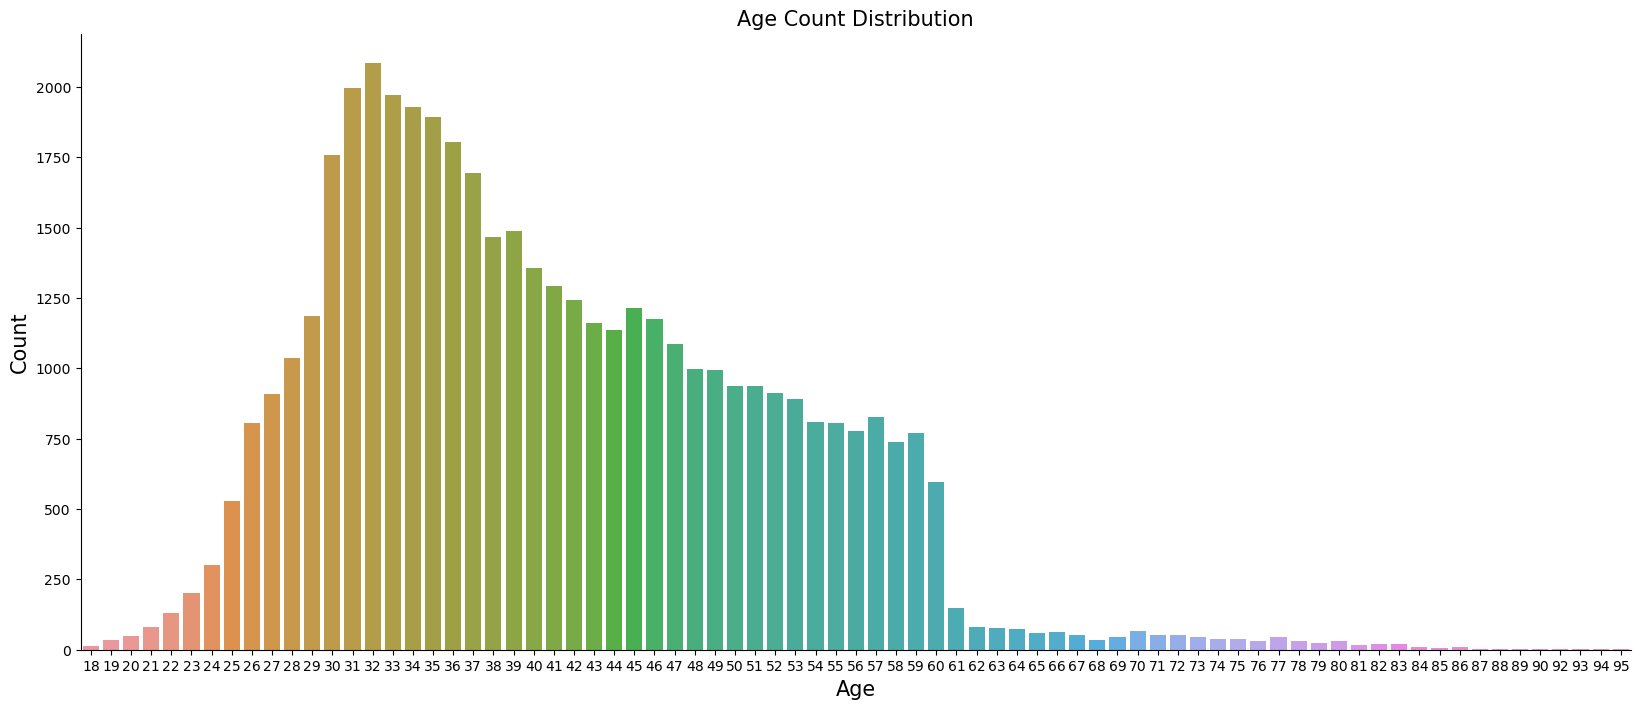

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

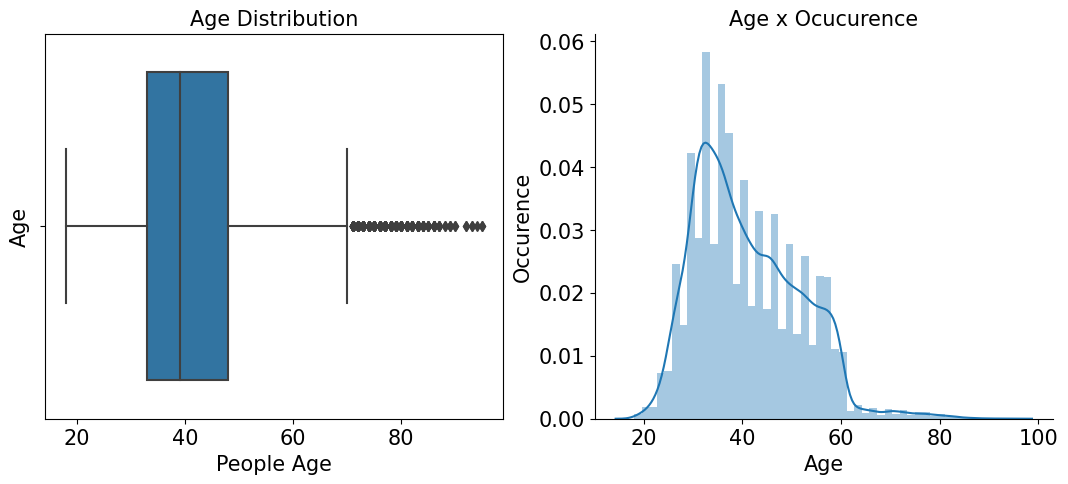

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)


In [18]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower_limit = q1 - (IQR * 1.5)
  # upper_limit = q3 + (IQR * 1.5)
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


In [19]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 70.5]['age'].count())
print('Number of clients: ', len(bank_client))

Numerber of outliers:  487
Number of clients:  45211


In [20]:
#function to creat group of ages, this helps because we have 77 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 39), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 39) & (dataframe['age'] <= 48), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

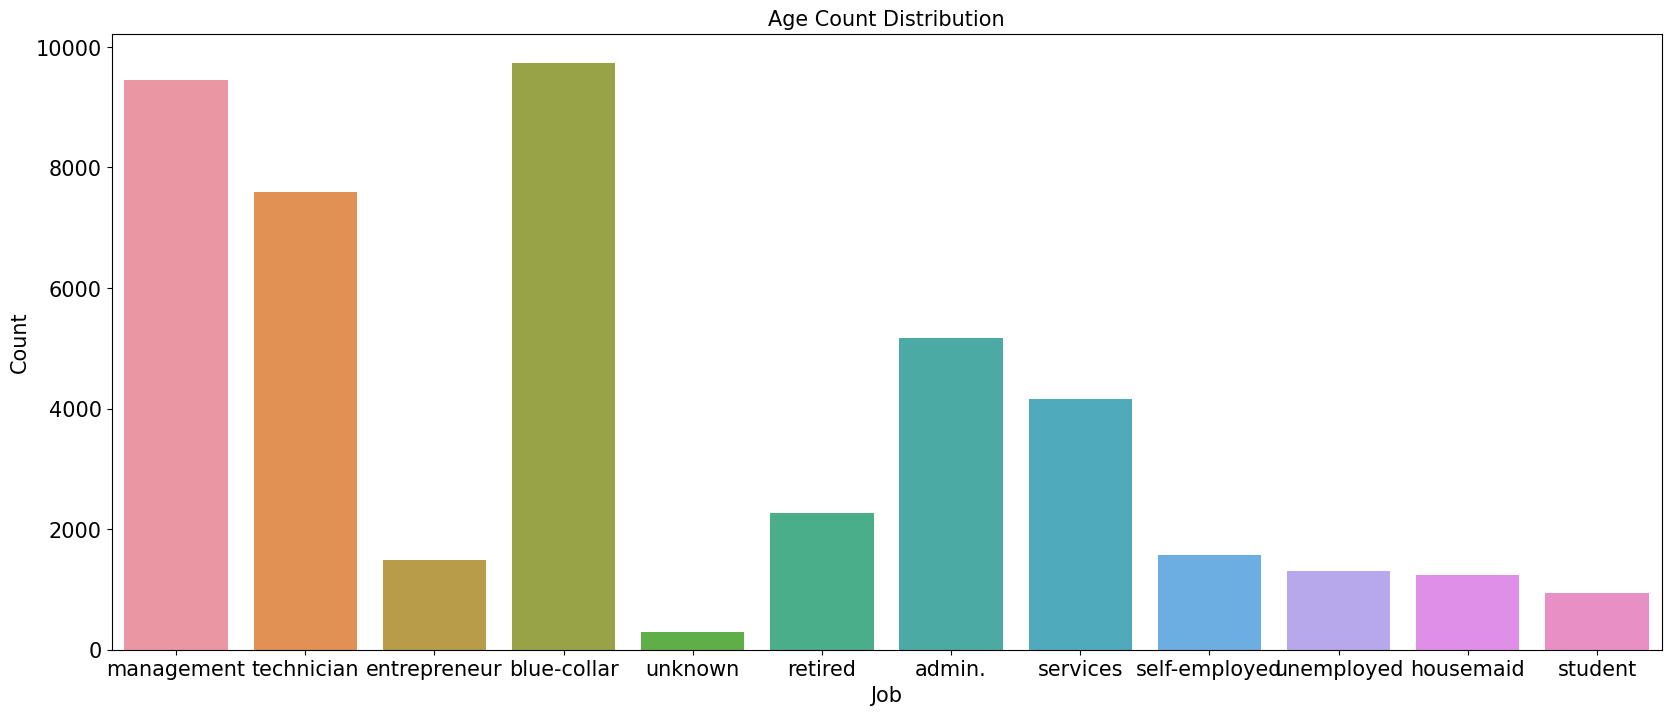

In [104]:
#Jobs
# What kind of jobs clients this bank have
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


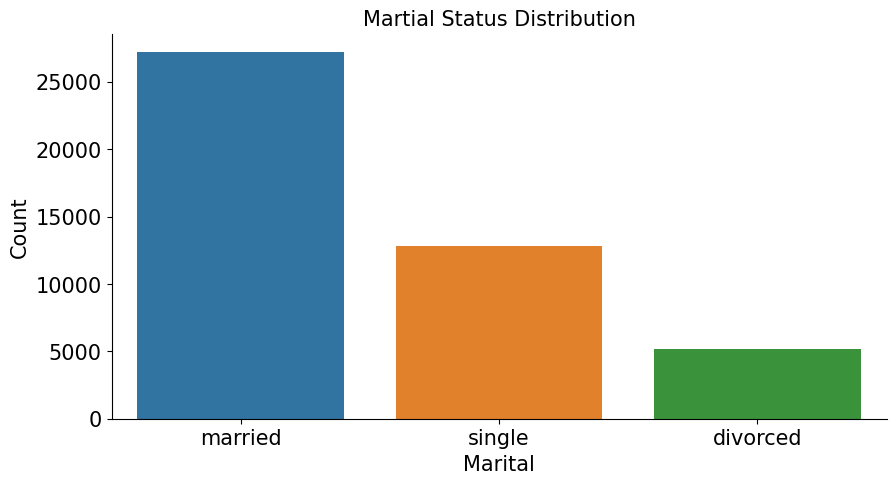

In [22]:
# Martial Status
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Martial Status Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Most of the people are married and single

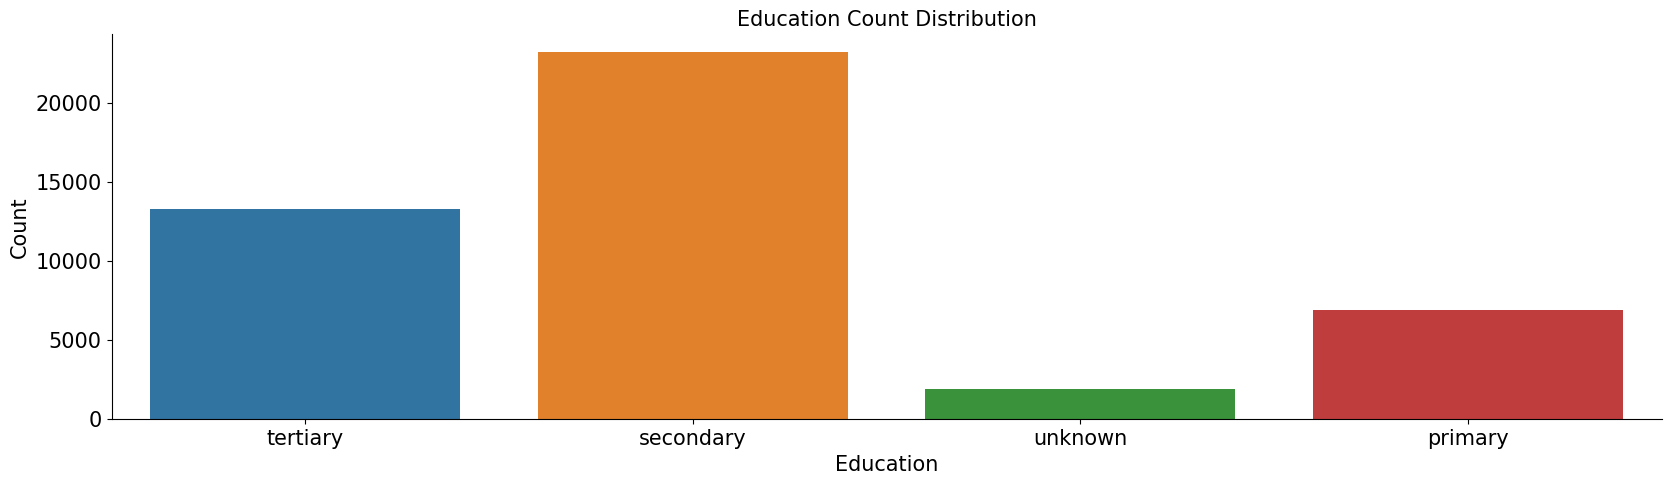

In [23]:
# Education
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

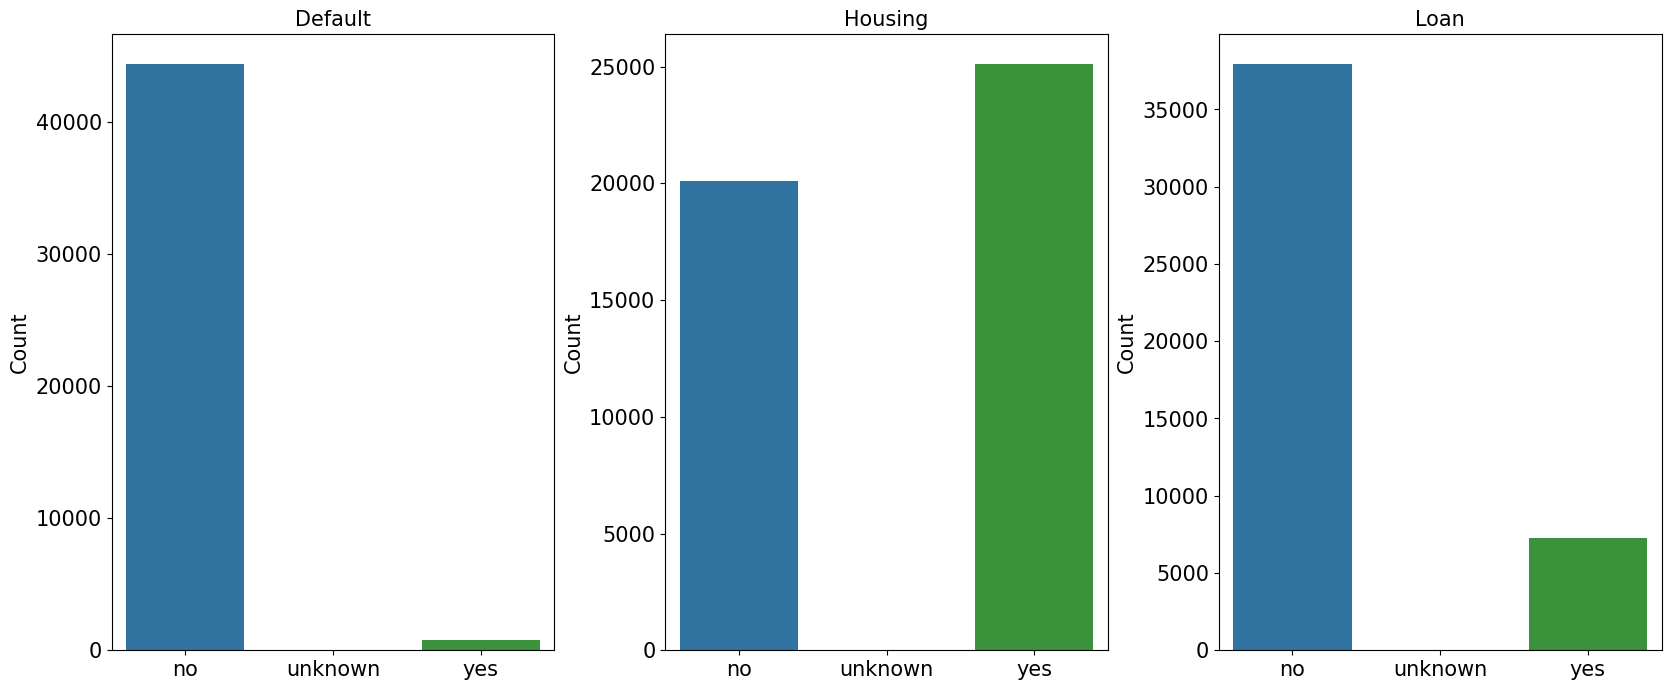

In [24]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

###### Converting categorical features to numerical

In [25]:
class CategoricalToNumerical():
    def __init__(self):
        self.columns = None
        self.mapping = {}
        
    def fit(self, X, y=None):
        self.columns = X.columns
        for col in X.columns:
            if X[col].dtype == 'object':
                values = list(set(X[col]))
                self.mapping[col] = {val:i for i, val in enumerate(values)}
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            if col in self.mapping:
                X[col] = X[col].apply(lambda x: self.mapping[col].get(x, -1))
        return X


In [26]:
# define categorical columns
categorical_cols = ['job', 'marital','education','default','housing','loan']

# create an instance of CategoricalToNumerical transformer
cat_to_num_transformer = CategoricalToNumerical()

# fit the transformer to the training data
cat_to_num_transformer.fit(bank_client[categorical_cols])

# transform the categorical columns in the training and test data
bank_client[categorical_cols] = cat_to_num_transformer.transform(bank_client[categorical_cols])

In [27]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,11,0,0,0,1,0
1,2,4,2,2,0,1,0
2,2,10,0,2,0,1,1
3,2,0,0,3,0,1,0
4,2,1,2,3,0,0,0


### Attributes related with the last contact of the current campaign:

In [28]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank_data.iloc[: , 8:12]
bank_related.head()

,contact,day,month,duration
0,unknown,5,may,261
1,unknown,5,may,151
2,unknown,5,may,76
3,unknown,5,may,92
4,unknown,5,may,198


In [29]:
print('\n contact:', bank_related['contact'].unique())
print('\n Day of week:', bank_related['day'].unique())
print('\n month:', bank_related['month'].unique())


 contact: ['unknown' 'cellular' 'telephone']

 Day of week: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

 month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


Day of week should be last contact day of the week (categorical: 'mon','tue','wed','thu','fri') but here data might be wrong better to drop the feature and see the model performance

In [ ]:
#droping day of week column
bank_related=bank_related.drop(labels='day',axis=1)

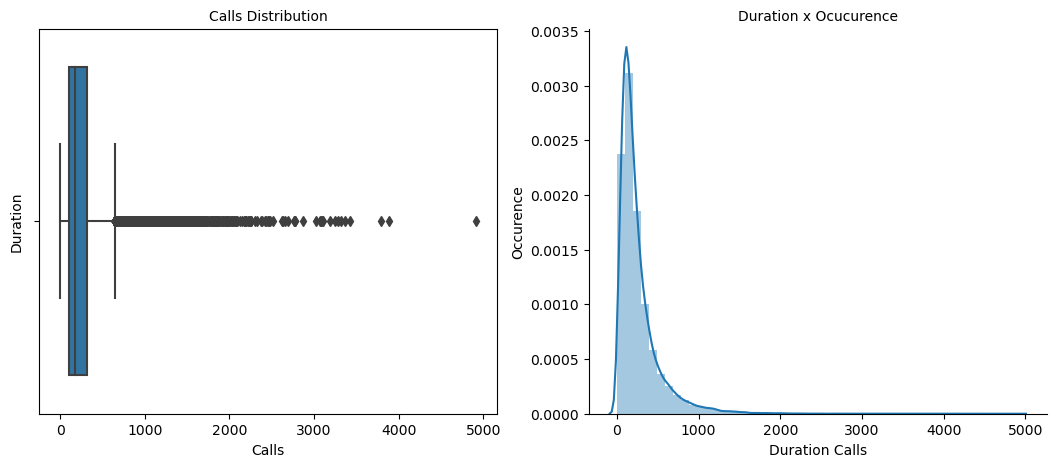

In [30]:
#boxplot of duration feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)


In [31]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower_limit = q1 - (IQR * 1.5)
  # upper_limit = q3 + (IQR * 1.5)
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  643.0 are outliers


In [32]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 643]['duration'].count())
print('Number of clients: ', len(bank_related))

Numerber of outliers:  3235
Number of clients:  45211


In [33]:
# if the call duration is equal to 0, then is obviously that this person didn't subscribed, 
bank_data[(bank_data['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


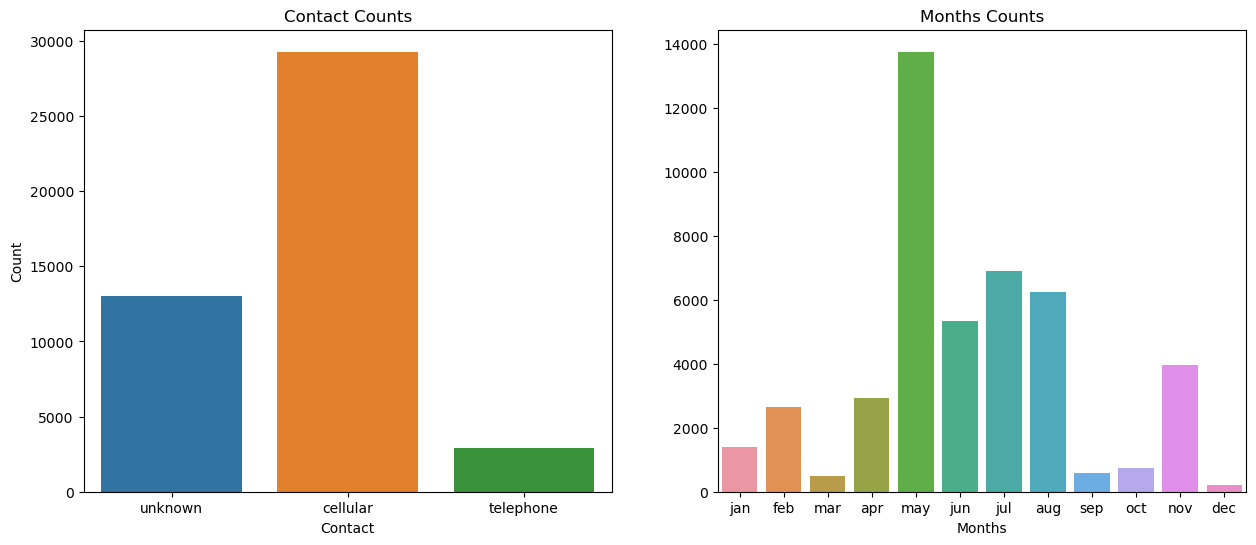

In [34]:
#Contacts made by which means
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

#Contacts month of the year
sns.countplot(bank_related['month'], ax = ax2, order = ['jan','feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('Count')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

In [35]:
#Converting categorical attributes to numerical
# define categorical columns
categorical_cols = ['contact', 'month']

# create an instance of CategoricalToNumerical transformer
cat_to_num_transformer = CategoricalToNumerical()

# fit the transformer to the training data
cat_to_num_transformer.fit(bank_related[categorical_cols])

# transform the categorical columns in the training and test data
bank_related[categorical_cols] = cat_to_num_transformer.transform(bank_related[categorical_cols])

In [37]:
bank_related.head()

,contact,month,duration
0,1,9,261
1,1,9,151
2,1,9,76
3,1,9,92
4,1,9,198


In [38]:
#dividing duration to 5 classes
def duration(data):

    data.loc[data['duration'] <= 103, 'duration'] = 1
    data.loc[(data['duration'] > 103) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 643), 'duration'] = 4
    data.loc[data['duration']  > 643, 'duration'] = 5

    return data
duration(bank_related);

In [39]:
bank_related.head()

,contact,month,duration
0,1,9,3
1,1,9,2
2,1,9,1
3,1,9,1
4,1,9,3


#### Other attributes

In [40]:
bank_other = bank_data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_other.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,unknown
1,1,-1,0,unknown
2,1,-1,0,unknown
3,1,-1,0,unknown
4,1,-1,0,unknown


In [41]:
print('\n poutcome:', bank_other['poutcome'].unique())
print('\n campaign:', bank_other['campaign'].unique())
print('\n pdays:', bank_other['pdays'].unique())
print('\n previous:', bank_other['previous'].unique())


 poutcome: ['unknown' 'failure' 'other' 'success']

 campaign: [   1 7661    2    3    5    4    6    7    8    9   10   11   12   13
   19   14   24   16   32   18   22   15   17   25   21  482   43   51
   63   41   26   28   55   50   38   23   20   29   31   37   30   46
   27   58   33   35   34   36   39   44 5451 4551 4674  771 1563  891
  546 5553 4552]

 pdays: [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244
 239 245 204 231 238 258 230 254 265  71 223 246 250 266 240 205 261 259
 241 260 234 251 225 161 237 262 248 255 2

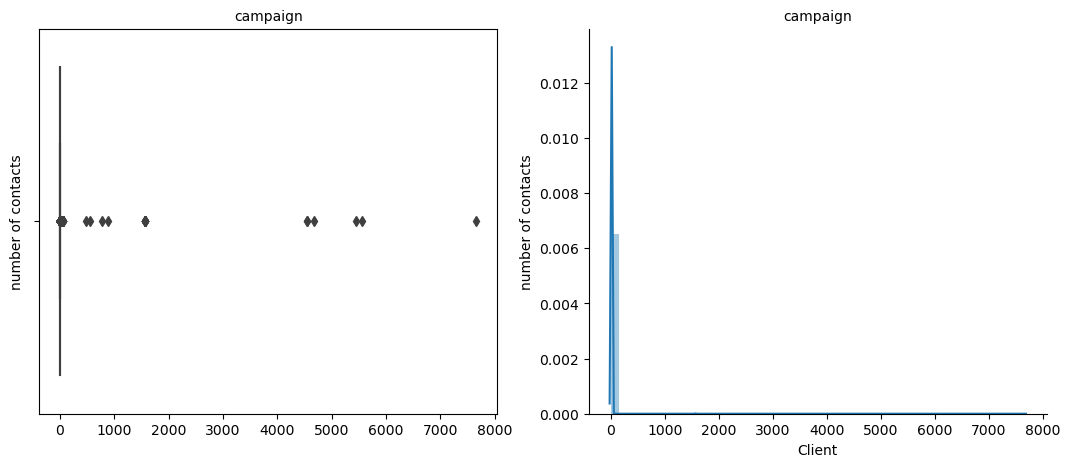

In [42]:
#plot of campaign feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'campaign', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('', fontsize=10)
ax1.set_ylabel('number of contacts', fontsize=10)
ax1.set_title('campaign', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['campaign'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Client', fontsize=10)
ax2.set_ylabel('number of contacts', fontsize=10)
ax2.set_title('campaign', fontsize=10)
ax2.tick_params(labelsize=10)


In [43]:
print('1º Quartile: ', bank_other['campaign'].quantile(q = 0.25))
print('2º Quartile: ', bank_other['campaign'].quantile(q = 0.50))
print('3º Quartile: ', bank_other['campaign'].quantile(q = 0.75))
print('4º Quartile: ', bank_other['campaign'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower_limit = q1 - (IQR * 1.5)
  # upper_limit = q3 + (IQR * 1.5)
    
print('Campaign above: ', bank_other['campaign'].quantile(q = 0.75) + 
                      1.5*(bank_other['campaign'].quantile(q = 0.75) - bank_other['campaign'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  7661.0
Campaign above:  6.0 are outliers


In [44]:
#Campaign column outlier treatment
q3 = bank_other['campaign'].quantile(0.75)  
q1 = bank_other['campaign'].quantile(0.25)
#print(q3)
#print(q1)
IQR = q3 - q1
#print(IQR)
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
bank_other['campaign']=np.where(bank_other['campaign']>upper_limit,upper_limit,
    np.where(bank_other['campaign']<lower_limit,lower_limit,bank_other['campaign']))

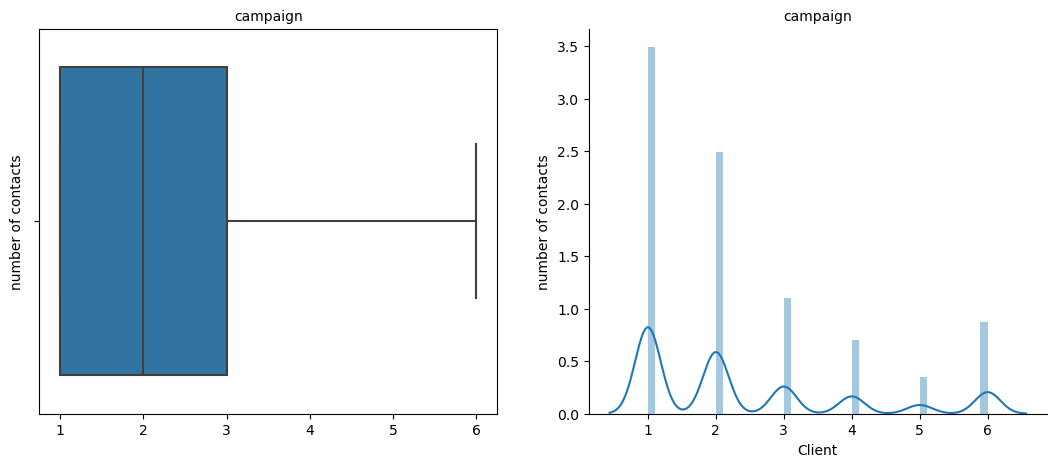

In [106]:
#plot of campaign feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'campaign', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('', fontsize=10)
ax1.set_ylabel('number of contacts', fontsize=10)
ax1.set_title('campaign', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['campaign'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Client', fontsize=10)
ax2.set_ylabel('number of contacts', fontsize=10)
ax2.set_title('campaign', fontsize=10)
ax2.tick_params(labelsize=10)


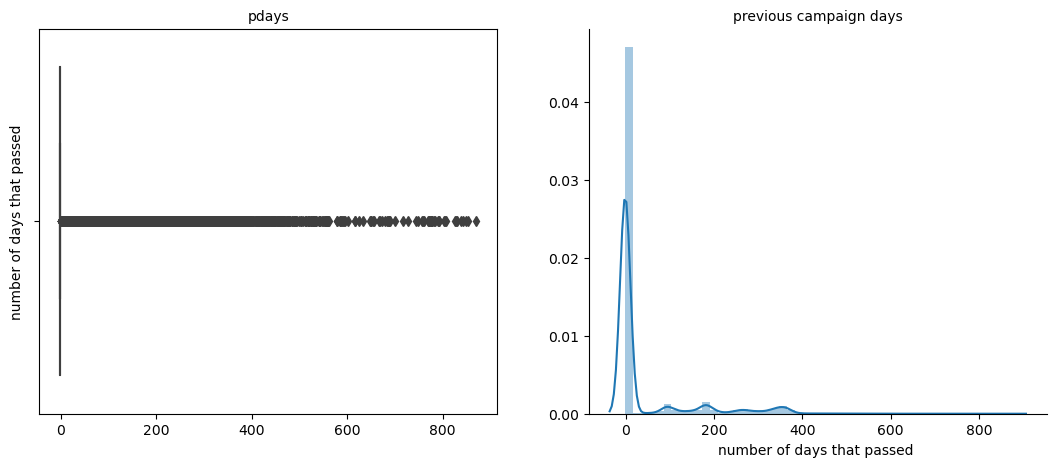

In [45]:
#plot of pdays feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'pdays', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('', fontsize=10)
ax1.set_ylabel('number of days that passed', fontsize=10)
ax1.set_title('pdays', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['pdays'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('number of days that passed ', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('previous campaign days', fontsize=10)
ax2.tick_params(labelsize=10)


In [46]:
bank_other[bank_other['pdays']==999]

,campaign,pdays,previous,poutcome


In [47]:
bank_other[bank_other['pdays']==-1]

,campaign,pdays,previous,poutcome
0,1.0,-1,0,unknown
1,1.0,-1,0,unknown
2,1.0,-1,0,unknown
3,1.0,-1,0,unknown
4,1.0,-1,0,unknown
...,...,...,...,...
45203,1.0,-1,0,unknown
45205,2.0,-1,0,unknown
45206,3.0,-1,0,unknown
45207,2.0,-1,0,unknown


pdays value cannot be -1

In [48]:
#droping pdays of week column
bank_other=bank_other.drop(labels='pdays',axis=1)

ValueError: Could not interpret input 'previous'

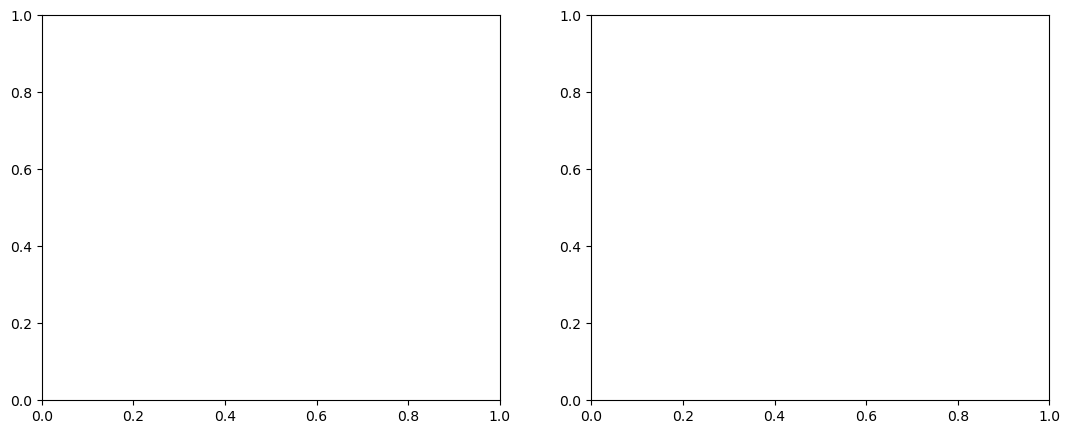

In [105]:
#plot of previous feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'previous', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('', fontsize=10)
ax1.set_ylabel('number of days that passed', fontsize=10)
ax1.set_title('pdays', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['previous'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('number of days that passed ', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('previous campaign days', fontsize=10)
ax2.tick_params(labelsize=10)


In [50]:
print('1º Quartile: ', bank_other['previous'].quantile(q = 0.25))
print('2º Quartile: ', bank_other['previous'].quantile(q = 0.50))
print('3º Quartile: ', bank_other['previous'].quantile(q = 0.75))
print('4º Quartile: ', bank_other['previous'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower_limit = q1 - (IQR * 1.5)
  # upper_limit = q3 + (IQR * 1.5)
    
print('Campaign above: ', bank_other['previous'].quantile(q = 0.75) + 
                      1.5*(bank_other['previous'].quantile(q = 0.75) - bank_other['previous'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
4º Quartile:  275.0
Campaign above:  0.0 are outliers


In [51]:
#droping previous column
bank_other=bank_other.drop(labels='previous',axis=1)

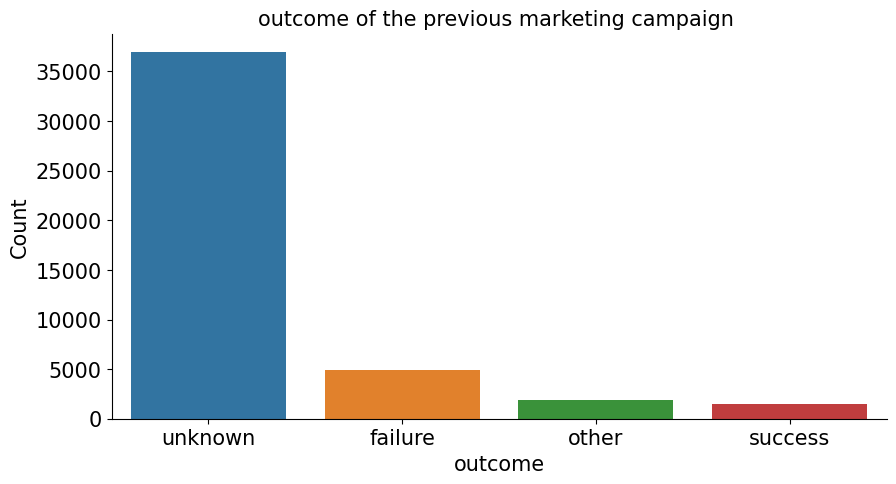

In [52]:
#Ploting campaign column
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'poutcome', data = bank_other)
ax.set_xlabel('outcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('outcome of the previous marketing campaign ', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [53]:
#Converting poutcome attribute to numerical
bank_other['poutcome']=bank_other['poutcome'].map({'unknown':1,'failure':2,'other':3,'success':1})

In [54]:
bank_other.head()

,campaign,poutcome
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1


#### Y attribute

In [67]:
bank_data[['y']]

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [69]:
#Converting target variable to numerical
bank_data['y']=bank_data['y'].map({'no':0,'yes':1})

### Model

In [70]:
X= pd.concat([bank_client, bank_related,bank_other], axis = 1)
y=bank_data[['y']]

In [91]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome
0,3,11,0,0,0,1,0,1,9,3,1.0,1
1,2,4,2,2,0,1,0,1,9,2,1.0,1
2,2,10,0,2,0,1,1,1,9,1,1.0,1
3,2,0,0,3,0,1,0,1,9,1,1.0,1
4,2,1,2,3,0,0,0,1,9,3,1.0,1


In [92]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [73]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test


In [74]:
# Train and evaluate the model using the pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index #the index of the feature that this node splits on
        self.threshold = threshold #the threshold value used to split the data at this node
        self.left = left #the left child of this node
        self.right = right #the right child of this node
        self.info_gain = info_gain #the information gain obtained by splitting the data at this node
        
        # for leaf node
        self.value = value #the predicted value of the target variable at this node
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' The __init__() function is the constructor of the DecisionTreeClassifier class. It takes two parameters:

            min_samples_split: the minimum number of samples required to split a node
            max_depth: the maximum depth of the tree '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]#The X and Y variables represent the features and the target variable of the dataset
        num_samples, num_features = np.shape(X)#number of samples and features in the dataset
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' the split method is used to split the dataset into two subsets based on a given threshold value and a feature index. It takes the following parameters:

            dataset: The dataset to split.
            feature_index: The index of the feature to split on.
            threshold: The threshold value to split on.'''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])#contains all the rows where the feature value is less than or equal to the threshold
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        ''' function to compute information gain '''
        # calculate entropy of parent node
        parent_entropy = self.entropy(parent)
    
        # calculate entropy of left child node
        left_entropy = self.entropy(l_child)
        
        # calculate entropy of right child node
        right_entropy = self.entropy(r_child)
    
        # calculate weighted average entropy of child nodes
        child_entropy = (len(l_child)/len(parent))*left_entropy + (len(r_child)/len(parent))*right_entropy
    
        # calculate information gain
        gain = parent_entropy - child_entropy
    
        return gain

    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)#gets an array of unique class labels in the set of samples.
        entropy = 0 #This initializes the entropy variable to zero.
        for cls in class_labels: #loops over each class label in the array of unique class labels.
            p_cls = len(y[y == cls]) / len(y) #calculates the probability of a sample 
            entropy += -p_cls * np.log2(p_cls) 
        return entropy
    
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)#calculates the majority class label for a leaf node
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
    
        if not tree:
            tree = self.root
    
        if tree.value is not None:
            print(tree.value)
    
        else:
            print("X"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
        
            print(indent + "left: ", end="")
            self.print_tree(tree.left, indent + " ")
        
            print(indent + "right: ", end="")
            self.print_tree(tree.right, indent + " ")

    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict the class labels '''
        # convert X to numpy array
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        ''' function to traverse the tree and make predictions '''
        
        # leaf node
        if tree.value != None:
            return tree.value
        
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
        
    

In [95]:
model=DecisionTreeClassifier()
# Fit the decision tree on the entire training dataset
model.fit(X_train,y_train)

In [96]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
# Calculate the training accuracy of the model
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy:", acc)

Accuracy: 0.9351636806016368


In [97]:
y_test_pred = model.predict(X_test) 

In [98]:
accuracy_score(y_test,y_test_pred)

0.7013159349773306

In [78]:
class CategoricalToNumerical():
    def __init__(self):
        self.columns = None
        self.mapping = {}
        
    def fit(self, X, y=None):
        self.columns = X.columns
        for col in X.columns:
            if X[col].dtype == 'object':
                values = list(set(X[col]))
                self.mapping[col] = {val:i for i, val in enumerate(values)}
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            if col in self.mapping:
                X[col] = X[col].apply(lambda x: self.mapping[col].get(x, -1))
        return X


In [84]:
class OutlierTreatment():
    def __init__(self, method='iqr', multiplier=1.5):
        self.method = method
        self.multiplier = multiplier
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if self.method == 'iqr':
            Q1 = np.percentile(X, 25, axis=0)
            Q3 = np.percentile(X, 75, axis=0)
            IQR = Q3 - Q1
            lower = Q1 - self.multiplier * IQR
            upper = Q3 + self.multiplier * IQR
            return np.clip(X, lower, upper)
        
        elif self.method == 'zscore':
            Z = np.abs(stats.zscore(X))
            return X[(Z < self.multiplier).all(axis=1)]

In [81]:
class HyperparameterFinder():
    def __init__(self, max_depth_values, min_samples_split_values):
        self.max_depth_values = max_depth_values
        self.min_samples_split_values = min_samples_split_values
        self.best_hyperparameters = None

    def fit(self, X, y=None):        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        

        # Find the best hyperparameters using the find_best_hyperparameters function
        best_hyperparameters, best_accuracy = self.find_best_hyperparameters(X_train, y_train, X_test, y_test)
        

        # Store the best hyperparameters
        self.best_hyperparameters = best_hyperparameters

        # Create a new decision tree classifier with the best hyperparameters
        self.dt = DecisionTreeClassifier(max_depth=self.best_hyperparameters['max_depth'], min_samples_split=self.best_hyperparameters['min_samples_split'])

        # Fit the decision tree on the entire training dataset
        self.dt.fit(X_train, y_train)

        return self

    def transform(self, X, y=None):
        # Create a new decision tree classifier with the best hyperparameters
        dt = DecisionTreeClassifier(max_depth=self.best_hyperparameters['max_depth'], min_samples_split=self.best_hyperparameters['min_samples_split'])
        
        # Fit the decision tree on the entire training dataset
        dt.fit(X, y)

        # Return the predictions on the entire dataset
        return dt.predict(X), self.best_hyperparameters


    def find_best_hyperparameters(self, X_train, y_train, X_test, y_test):
        hyperparameters = {'max_depth': None, 'min_samples_split': None}
        best_accuracy = 0.0

        for max_depth in self.max_depth_values:
            for min_samples_split in self.min_samples_split_values:
                # Create a new decision tree classifier with the current hyperparameters
                dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

                # Fit the decision tree on the training dataset
                dt.fit(X_train, y_train)

                # Evaluate the decision tree on the testing dataset
                y_pred = dt.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)

                # Check if the current hyperparameters are better than the previous best hyperparameters
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    hyperparameters['max_depth'] = max_depth
                    hyperparameters['min_samples_split'] = min_samples_split
                    best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}
                # Print the current hyperparameters and accuracy for debugging
                print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, accuracy={accuracy}")
                
        # Print the best hyperparameters and accuracy for debugging
        print(f"best_hyperparameters={hyperparameters}, best_accuracy={best_accuracy}")
        return hyperparameters, accuracy

In [82]:
class Pipeline():
    def __init__(self, steps):
        self.steps = steps
    
    def fit_transform(self, X):
        for step in self.steps:
            X = step[1].fit_transform(X)
        return X
    
    def transform(self, X):
        for step in self.steps:
            X = step[1].transform(X)
        return X
    
    def fit(self, X, y=None):
        for step in self.steps:
            X = step[1].fit(X, y).transform(X)
        return self


In [88]:
preprocessing_pipeline = Pipeline([
     ('encoder', CategoricalToNumerical()),
    ('outlier_treatment', OutlierTreatment())
])

In [89]:
pipeline = Pipeline([   
    ('preprocessing', preprocessing_pipeline),
    ('hyper-parameter', HyperparameterFinder(max_depth_values=[2, 4,6,8,10], min_samples_split_values=[2, 4,6,8,10]))
    
])

In [90]:
pipeline.fit(X_train, y_train)

max_depth=2, min_samples_split=2, accuracy=0.8627315454796793
max_depth=2, min_samples_split=4, accuracy=0.8627315454796793
max_depth=2, min_samples_split=6, accuracy=0.8627315454796793
max_depth=2, min_samples_split=8, accuracy=0.8627315454796793
max_depth=2, min_samples_split=10, accuracy=0.8627315454796793
max_depth=4, min_samples_split=2, accuracy=0.8511197124688968
max_depth=4, min_samples_split=4, accuracy=0.8511197124688968
max_depth=4, min_samples_split=6, accuracy=0.8511197124688968
max_depth=4, min_samples_split=8, accuracy=0.8511197124688968
max_depth=4, min_samples_split=10, accuracy=0.8511197124688968
max_depth=6, min_samples_split=2, accuracy=0.8364666850981476
max_depth=6, min_samples_split=4, accuracy=0.8364666850981476
max_depth=6, min_samples_split=6, accuracy=0.8364666850981476
max_depth=6, min_samples_split=8, accuracy=0.8364666850981476
max_depth=6, min_samples_split=10, accuracy=0.8364666850981476


KeyError: 'info_gain'

In [ ]:
# Get the best hyperparameters for the DecisionTree model
best_hyperparameters = pipeline['hyper-parameter'].best_hyperparameters

print(best_hyperparameters)

# Create a new instance of the DecisionTree model with the best hyperparameters
dt_best = DecisionTreeClassifier(**best_hyperparameters)

# Fit the model on the training data
dt_best.fit(X_train, y_train)


In [ ]:
y_pred=dt_best.predict(X_test)

In [ ]:
# Evaluate the predictions using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")